<a href="https://colab.research.google.com/github/JSEFERINO/MISALUMNOS20252/blob/main/LABORATORIO_12_FABIANA_ARIZA_MONSALVE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 12 - Fabiana Ariza Monsalve**

### 🎲 **Simulación: Lanzamiento de una moneda**

Este experimento simula lanzar una moneda al aire múltiples veces y visualizar la cara de la moneda que mira hacia arriba al caer en tiempo real. Se muestran dos situaciones:
- El resultado del lanzamiento actual (cara o sello).
- Un gráfico de barras con la frecuencia acumulada de cada resultado.


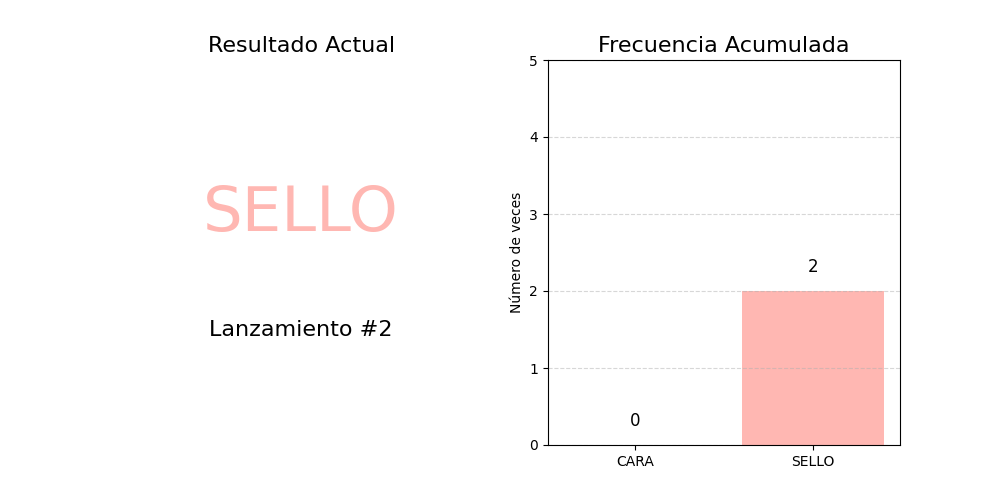

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from IPython.display import Image, display

def lanzar_moneda():
    return np.random.choice(['CARA', 'SELLO'])

conteo = {'CARA': 0, 'SELLO': 0}
colores = {'CARA': '#CBAACB', 'SELLO': '#FFB7B2'}

fig, ejes = plt.subplots(1, 2, figsize=(10, 5))

def actualizar(frame):
    resultado = lanzar_moneda()
    conteo[resultado] += 1
    total_lanzamientos = sum(conteo.values())

    # Panel del resultado actual
    ejes[0].cla()
    ejes[0].text(0.5, 0.6, resultado, fontsize=45, ha='center', va='center', color=colores[resultado])
    ejes[0].text(0.5, 0.3, f"Lanzamiento #{total_lanzamientos}", fontsize=16, ha='center', va='center')
    ejes[0].set_title("Resultado Actual", fontsize=16)
    ejes[0].axis('off')

    # Panel de la frecuencia
    ejes[1].cla()
    barras = ejes[1].bar(conteo.keys(), conteo.values(), color=[colores['CARA'], colores['SELLO']])
    ejes[1].set_ylim(0, max(conteo.values()) + 3)
    ejes[1].set_title("Frecuencia Acumulada", fontsize=16)
    ejes[1].set_ylabel("Número de veces")
    ejes[1].grid(axis='y', linestyle='--', alpha=0.5)

    # Mostrar valor encima de cada barra
    for bar in barras:
        yval = bar.get_height()
        ejes[1].text(bar.get_x() + bar.get_width()/2, yval + 0.2, int(yval), ha='center', va='bottom', fontsize=12)

# Animación
animacion = animation.FuncAnimation(fig, actualizar, frames=50, interval=800, repeat=False)

gif_path = "simulacion_moneda_mejorado.gif"
animacion.save(gif_path, writer=PillowWriter(fps=2))
plt.close(fig)
display(Image(filename=gif_path))

### 🎲 **Simulación: Lanzamiento de un dado**

Esta simulación muestra el lanzamiento de un dado justo de seis caras. Se visualiza:
- El número obtenido en cada lanzamiento.
- La frecuencia acumulada de cada cara en un gráfico de barras.

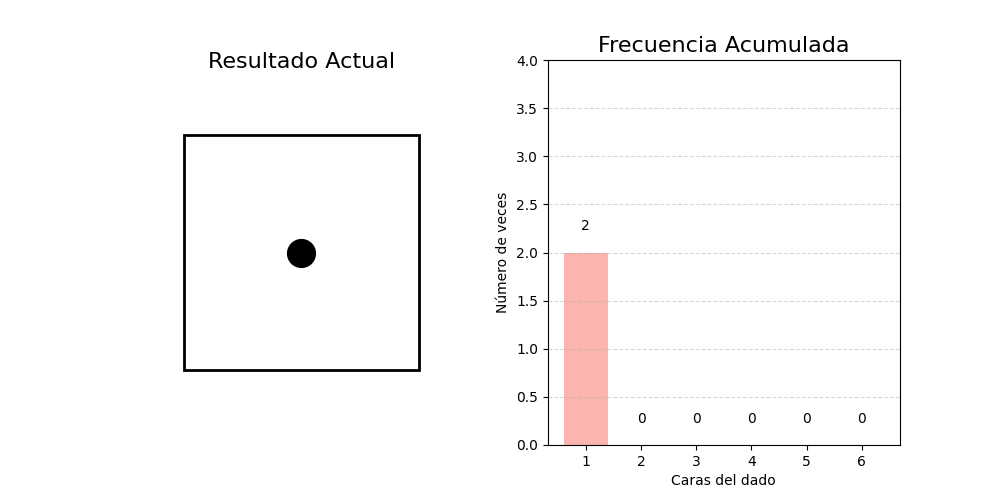

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from IPython.display import Image, display

# Función para lanzar dado
def lanzar_dado():
    return np.random.randint(1, 7)

# Coordenadas de puntos según valor del dado
puntos_dado = {
    1: [(1.5, 1.5)],
    2: [(1, 2), (2, 1)],
    3: [(1, 2), (1.5, 1.5), (2, 1)],
    4: [(1, 2), (2, 2), (1, 1), (2, 1)],
    5: [(1, 2), (2, 2), (1.5, 1.5), (1, 1), (2, 1)],
    6: [(1, 2), (2, 2), (1, 1.5), (2, 1.5), (1, 1), (2, 1)]
}

# Diccionario para acumular frecuencias
resultados = {str(i): 0 for i in range(1, 7)}
colores = plt.cm.Pastel1(np.linspace(0, 1, 6))

fig, ejes = plt.subplots(1, 2, figsize=(10, 5))

def dibujar_cara_dado(ax, valor):
    ax.cla()
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 3)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title("Resultado Actual", fontsize=16)
    # Dibujar contorno del dado
    ax.add_patch(plt.Rectangle((0.5, 0.5), 2, 2, fill=False, linewidth=2))
    # Dibujar puntos
    for (x, y) in puntos_dado[valor]:
        ax.plot(x, y, 'o', markersize=20, color='black')

def actualizar(frame):
    resultado = lanzar_dado()
    resultados[str(resultado)] += 1

    # Mostrar cara del dado
    dibujar_cara_dado(ejes[0], resultado)

    # Gráfico de barras
    ejes[1].cla()
    claves = list(resultados.keys())
    valores = list(resultados.values())
    barras = ejes[1].bar(claves, valores, color=colores)
    ejes[1].set_ylim(0, max(valores) + 2)
    ejes[1].set_title("Frecuencia Acumulada", fontsize=16)
    ejes[1].set_ylabel("Número de veces")
    ejes[1].set_xlabel("Caras del dado")
    ejes[1].grid(axis='y', linestyle='--', alpha=0.5)

    # Etiquetas encima de cada barra
    for bar in barras:
        yval = bar.get_height()
        ejes[1].text(bar.get_x() + bar.get_width()/2, yval + 0.2, int(yval),
                     ha='center', va='bottom', fontsize=10)

# Animación
animacion = animation.FuncAnimation(fig, actualizar, frames=20, interval=500, repeat=False)

gif_path = "simulacion_dado_con_cara.gif"
animacion.save(gif_path, writer=PillowWriter(fps=3))
plt.close(fig)
display(Image(filename=gif_path))


### 🎯 **Simulación: Resultados del Baloto**

Este experimento simula una jugada del Baloto, seleccionando 5 números principales y 1 balota adicional, replicando el juego real en Colombia.

In [ ]:
import random

def simular_baloto():
    numeros_principales = sorted(random.sample(range(1, 44), 5))
    balota_adicional = random.randint(1, 16)
    return numeros_principales, balota_adicional

# Ejemplo de simulación
jugada = simular_baloto()
print(f"Números principales: {jugada[0]}")
print(f"Balota adicional: {jugada[1]}")

Números principales: [18, 23, 24, 33, 43]
Balota adicional: 1


<ipython-input-10-30db4d093006>:51: UserWarning: Glyph 127921 (\N{BILLIARDS}) missing from font(s) DejaVu Sans.
  ani.save(gif_path, writer=PillowWriter(fps=2))


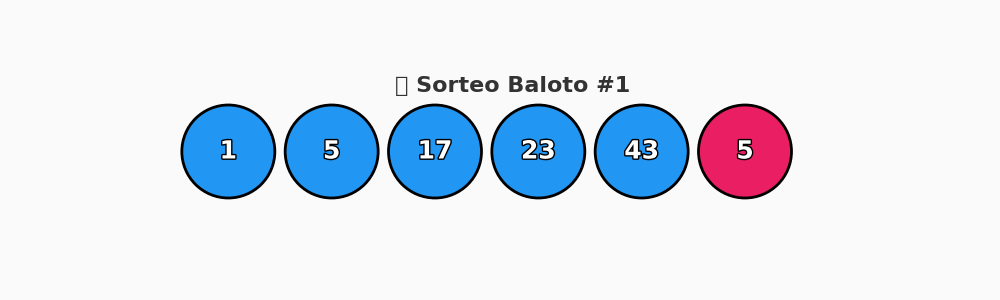

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from matplotlib.animation import PillowWriter
from IPython.display import Image, display
from matplotlib.patches import Circle
import matplotlib.patheffects as path_effects

# Simulación de baloto
def simular_baloto():
    numeros_principales = sorted(np.random.choice(range(1, 44), size=5, replace=False))
    balota_adicional = np.random.randint(1, 17)
    return numeros_principales, balota_adicional

# Dibujo de balota circular y realista
def dibujar_balota(ax, x, y, texto, facecolor, edgecolor='black'):
    circle = Circle((x, y), 0.45, facecolor=facecolor, edgecolor=edgecolor, linewidth=2, zorder=1)
    ax.add_patch(circle)
    txt = ax.text(x, y, texto, ha='center', va='center', fontsize=18, fontweight='bold', color='white', zorder=2)
    txt.set_path_effects([path_effects.withStroke(linewidth=2, foreground='black')])

# Crear animación
def crear_animacion(resultados):
    fig, ax = plt.subplots(figsize=(10, 3))
    fig.patch.set_facecolor('#FAFAFA')

    def actualizar(frame):
        ax.clear()
        numeros_principales, balota_adicional = resultados[frame]

        for i, numero in enumerate(numeros_principales):
            dibujar_balota(ax, i, 0.5, str(numero), facecolor='#2196F3')  # Azul moderno

        dibujar_balota(ax, len(numeros_principales), 0.5, str(balota_adicional), facecolor='#E91E63')  # Rosa fuerte

        ax.set_xlim(-1, len(numeros_principales) + 1.5)
        ax.set_ylim(0, 1)
        ax.set_aspect('equal')  # Balotas circulares
        ax.axis('off')

        ax.set_title(f"Sorteo Baloto #{frame+1}", fontsize=16, fontweight='bold', color='#333')

    ani = animation.FuncAnimation(fig, actualizar, frames=len(resultados), interval=900, repeat=False)
    return ani

# Ejecutar
resultados = [simular_baloto() for _ in range(20)]
ani = crear_animacion(resultados)

gif_path = "baloto_circular.gif"
ani.save(gif_path, writer=PillowWriter(fps=2))
plt.close()
display(Image(filename=gif_path))


### **🎲 🎲 Simulación: Lanzamiento de dos dados distinguibles**

Esta simulación muestra el lanzamiento de dos dados distinguibles de seis caras. Se visualiza:
- El número obtenido en cada lanzamiento.
- La frecuencia acumulada de cada cara en un gráfico de barras.

/usr/local/lib/python3.11/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


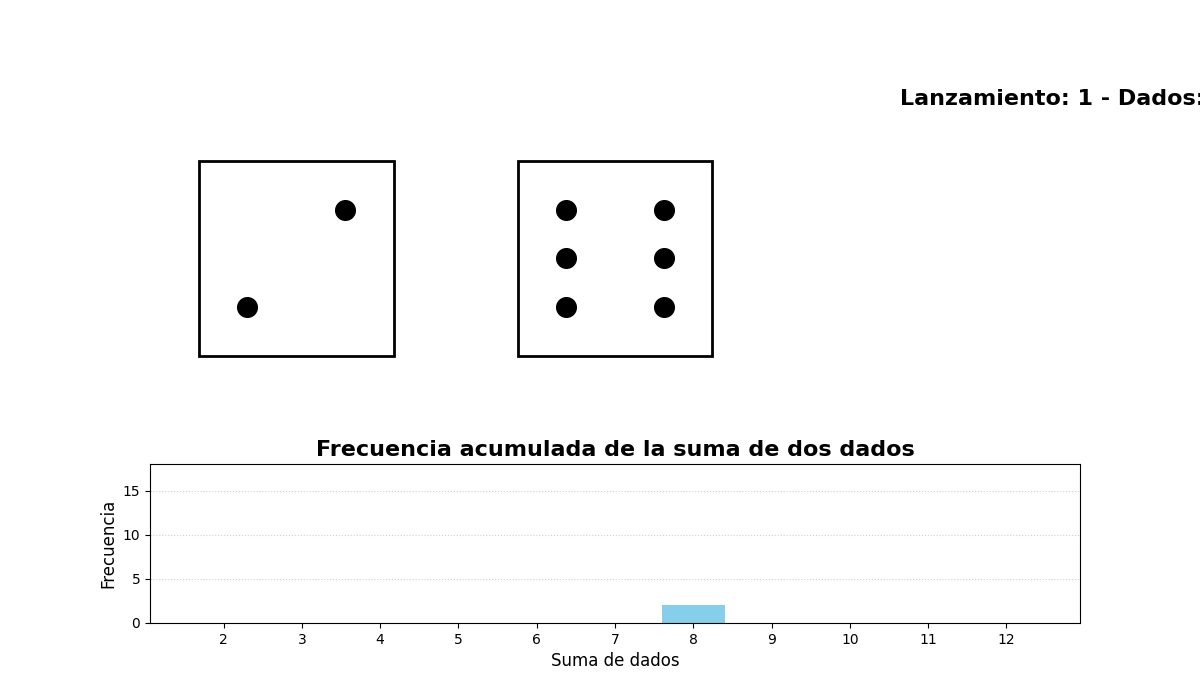

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import Image, display

# Función para dibujar un dado con puntos según el número
def dibujar_dado(ax, num):
    ax.clear()
    ax.set_xlim(-0.5, 2.5)
    ax.set_ylim(-0.5, 2.5)
    ax.set_aspect('equal')
    ax.axis('off')
    dado_cuadro = plt.Rectangle((0,0), 2, 2, fill=True, color='white', ec='black', lw=2)
    ax.add_patch(dado_cuadro)
    puntos_pos = {
        1: [(1,1)],
        2: [(0.5,0.5), (1.5,1.5)],
        3: [(0.5,0.5), (1,1), (1.5,1.5)],
        4: [(0.5,0.5), (1.5,0.5), (0.5,1.5), (1.5,1.5)],
        5: [(0.5,0.5), (1.5,0.5), (1,1), (0.5,1.5), (1.5,1.5)],
        6: [(0.5,0.5), (1.5,0.5), (0.5,1), (1.5,1), (0.5,1.5), (1.5,1.5)]
    }
    for (x,y) in puntos_pos[num]:
        ax.scatter(x, y, s=200, c='black')

# Simular lanzamientos de dos dados
n_lanzamientos = 30
dados1 = np.random.randint(1, 7, size=n_lanzamientos)
dados2 = np.random.randint(1, 7, size=n_lanzamientos)
sumas = dados1 + dados2

frecuencias = {i:0 for i in range(2, 13)}

# Crear figura y ejes
fig = plt.figure(figsize=(12, 7))
ax_dado1 = plt.subplot2grid((3,6), (0,0), colspan=2, rowspan=2)
ax_dado2 = plt.subplot2grid((3,6), (0,2), colspan=2, rowspan=2)
ax_barras = plt.subplot2grid((3,6), (2,0), colspan=6)

x_labels = [str(i) for i in range(2, 13)]
bars = ax_barras.bar(x_labels, [0]*11, color='skyblue')
ax_barras.set_ylim(0, n_lanzamientos//2 + 3)
ax_barras.set_title("Frecuencia acumulada de la suma de dos dados", fontsize=16, fontweight='bold')
ax_barras.set_xlabel("Suma de dados", fontsize=12)
ax_barras.set_ylabel("Frecuencia", fontsize=12)
ax_barras.grid(axis='y', linestyle=':', alpha=0.6)

texto_lanzamiento = fig.text(0.75, 0.85, '', fontsize=16, fontweight='bold')

def actualizar(i):
    dibujar_dado(ax_dado1, dados1[i])
    dibujar_dado(ax_dado2, dados2[i])

    suma_actual = sumas[i]
    frecuencias[suma_actual] += 1

    for bar, suma in zip(bars, range(2, 13)):
        bar.set_height(frecuencias[suma])

    texto_lanzamiento.set_text(f"Lanzamiento: {i+1} - Dados: {dados1[i]} + {dados2[i]} = {suma_actual}")
    return bars

ani = animation.FuncAnimation(fig, actualizar, frames=n_lanzamientos, interval=600, blit=False, repeat=False)

# Guardar gif
gif_path = "lanzamiento_dados.gif"
ani.save(gif_path, writer='pillow', fps=2)

plt.close(fig)

# Mostrar el gif
display(Image(filename=gif_path))


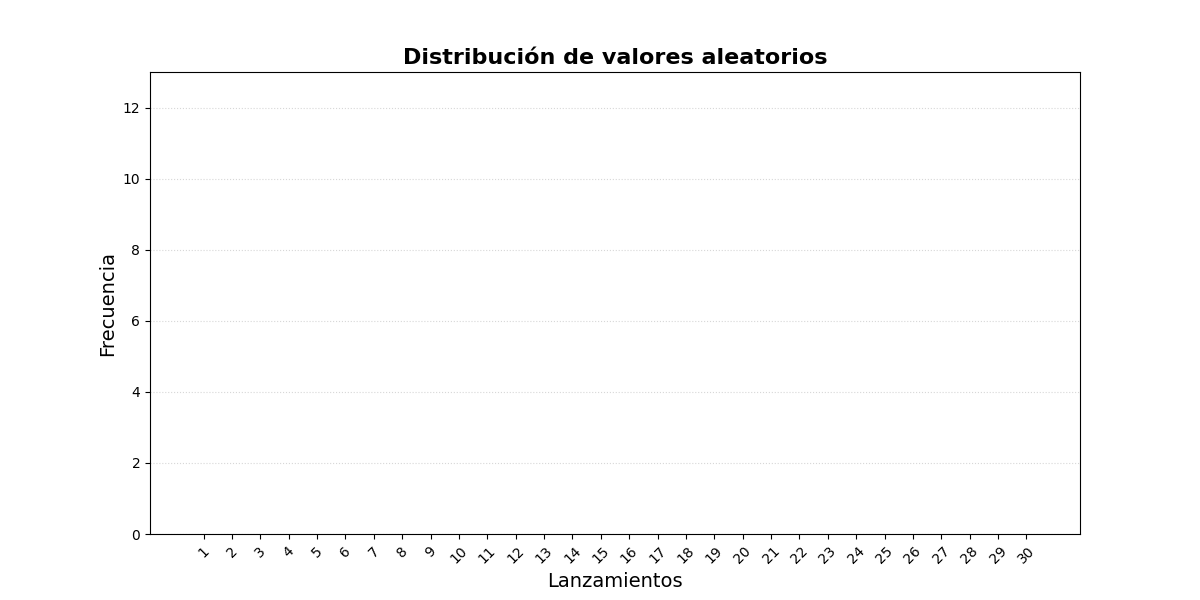

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import Image, display

# 1. Simular datos aleatorios para 30 lanzamientos (valores entre 1 y 9)
num_lanzamientos = 30
x_labels = [str(i) for i in range(1, num_lanzamientos + 1)]
valores = np.random.randint(1, 10, size=num_lanzamientos)

# 2. Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 6))

# Paleta colores pastel generada manualmente (30 colores)
colores_pastel = plt.cm.Pastel1(np.linspace(0, 1, num_lanzamientos))

# Crear barras iniciales con altura cero
bars = ax.bar(
    x_labels,
    np.zeros_like(valores),
    color=colores_pastel
)

# 3. Configurar estética del gráfico
ax.set_ylim(0, max(valores) + 4)
ax.set_title("Distribución de valores aleatorios", fontsize=16, fontweight='bold')
ax.set_xlabel("Lanzamientos", fontsize=14)
ax.set_ylabel("Frecuencia", fontsize=14)
ax.tick_params(axis='x', labelrotation=45)
ax.grid(axis='y', linestyle=':', alpha=0.5)

# Crear etiquetas de texto vacías para los valores encima de las barras
textos = []
for bar in bars:
    texto = ax.text(bar.get_x() + bar.get_width()/2, 0, '', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')
    textos.append(texto)

# 4. Función de animación: incrementa gradualmente la altura de las barras y actualiza texto
def animate(frame):
    progreso = frame / 20  # va de 0 a 1 en 21 frames
    for bar, altura_final, texto in zip(bars, valores, textos):
        altura_actual = altura_final * progreso
        bar.set_height(altura_actual)
        texto.set_y(altura_actual + 0.2)  # un poco arriba de la barra
        texto.set_text(f"{int(altura_actual)}" if altura_actual > 0 else '')
    return list(bars) + textos

# 5. Crear animación
ani = animation.FuncAnimation(
    fig,
    animate,
    frames=21,      # 21 cuadros para animación suave
    interval=100,   # 100 ms entre cuadros
    blit=True,
    repeat=False
)

# 6. Guardar la animación como GIF
gif_path = "distribucion_valores.gif"
ani.save(gif_path, writer='pillow', fps=10)

# Cerrar la figura para no mostrar el plot estático
plt.close(fig)

# 7. Mostrar el GIF generado (funciona en Jupyter/IPython)
display(Image(filename=gif_path))


